<a href="https://colab.research.google.com/github/PedroMesquitaIsidoro/logicaFuzzy/blob/main/aspirador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 29.8 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=90671eda44ee690665b67d9f77f80b0b9cdf18d5dc4a83c8df9dba42fb82ab6d
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


***Ante e Conse***

In [17]:
superficie = ctrl.Antecedent(np.arange(0, 6, 1), 'superficie')
sujeira = ctrl.Antecedent(np.arange(0, 6, 1), 'sujeira')


In [18]:
succao = ctrl.Consequent(np.arange(0, 11, 1), 'succao')

 **FUNCAO DE PERTINENCIA**

In [19]:
superficie.automf(number = 3, names = ['facil', 'moderada', 'dificil'])
sujeira.automf(number = 3, names = ['leve', 'moderada', 'pesada'])


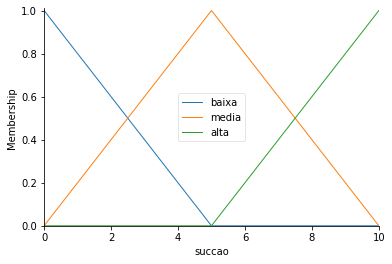

In [20]:
succao['baixa'] = fuzz.trimf(succao.universe, [0, 0, 5])
succao['media'] = fuzz.trimf(succao.universe, [0, 5, 10])
succao['alta'] = fuzz.trimf(succao.universe, [5, 10, 10])
succao.view()

**REGRAS**

In [21]:
#REGRAS
# SE A SUPERFICIE FOR FACIL E A SUJEIRA FOR LEVE, ENTAO A SUCCAO EH BAIXA
# SE A SUPERFICIE FOR MODERADA E A SUJEIRA FOR LEVE, ENTAO A SUCCAO SERA MEDIA
# SE A SUPERFICIE FOR DIFICIL OU A SUJEIRA FOR PESADA, ENTAO A SUCCAO SERA ALTA
# SE A SUPERFICIE FOR MODERADA ENTAO A SUCCAO SERA MEDIA 

In [22]:
regra1 = ctrl.Rule(superficie['facil'] & sujeira['leve'], succao['baixa'])
regra2 = ctrl.Rule(superficie['moderada'] & sujeira['leve'], succao['media'])
regra3 = ctrl.Rule(superficie['dificil'] | sujeira['pesada'], succao['alta'])
regra4 = ctrl.Rule(superficie['moderada'], succao['media'])

**DEFUZZIFICACAO**

In [23]:
sistema_controle = ctrl.ControlSystem([regra1, regra2, regra3, regra4])
sistema = ctrl.ControlSystemSimulation(sistema_controle)

4.904761904761906


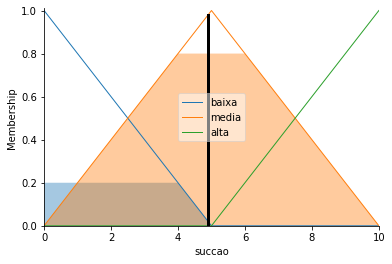

In [25]:
#lugar dos input aqui
sistema.input['superficie'] = 2
sistema.input['sujeira'] = 0
sistema.compute()
print(sistema.output['succao'])
succao.view(sim = sistema)